In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score


In [22]:
S=pd.read_csv("healthcare-dataset-stroke-data.csv")
S

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [23]:
S["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

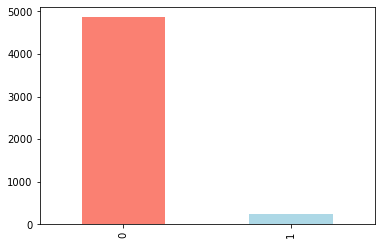

In [24]:
S["stroke"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [25]:
S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [26]:
S.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [28]:

S['bmi'].fillna(S['bmi'].mean(),inplace=True) 
S.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

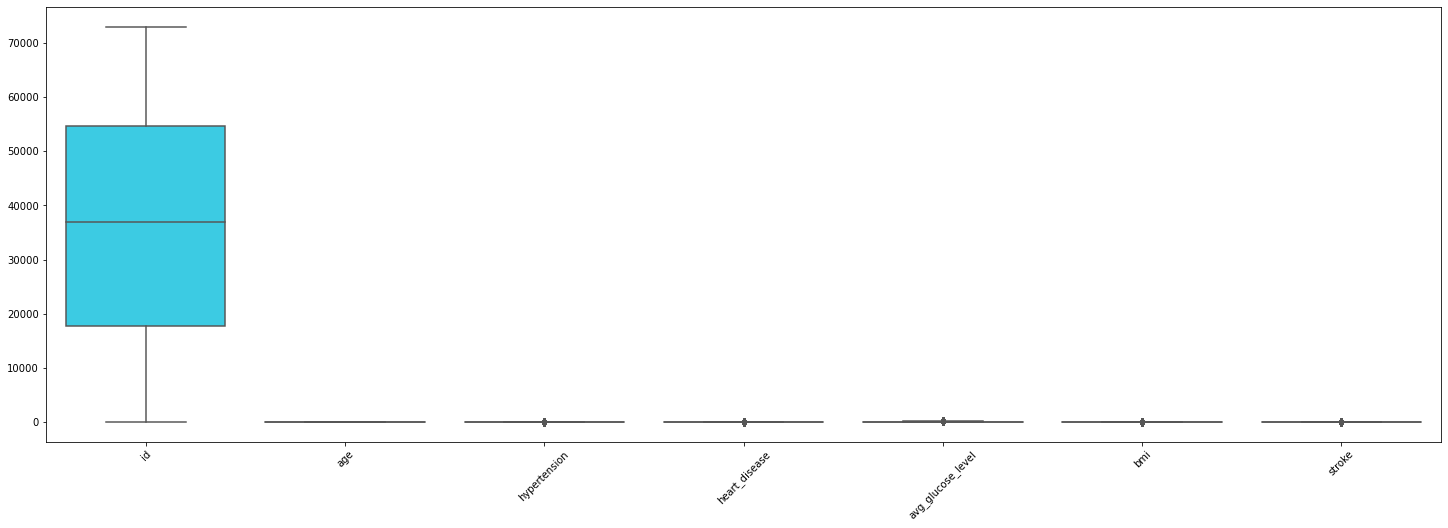

In [29]:
plt.figure(figsize = (25,8));
u = sns.boxplot(palette = 'cool',data=S);
u.set_xticklabels(u.get_xticklabels(),rotation=45);

In [30]:
pd.crosstab(S.stroke,S.gender)

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


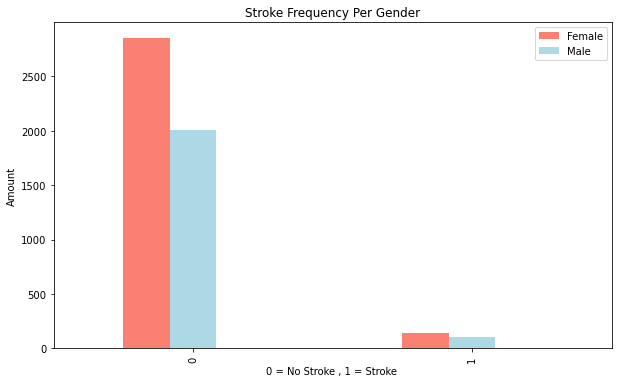

In [31]:
pd.crosstab(S.stroke,S.gender).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.title("Stroke Frequency Per Gender")
plt.xlabel("0 = No Stroke , 1 = Stroke ")
plt.ylabel("Amount");
plt.legend(["Female","Male"]);


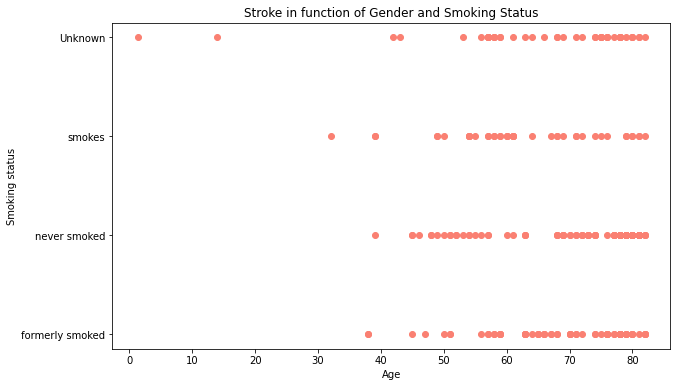

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(S.age[S.stroke==1],S.smoking_status[S.stroke==1],c="salmon");
plt.title("Stroke in function of Gender and Smoking Status")
plt.xlabel("Age")
plt.ylabel("Smoking status");


In [33]:

pd.crosstab(S.stroke,S.heart_disease)

heart_disease,0,1
stroke,,
0,4632,229
1,202,47


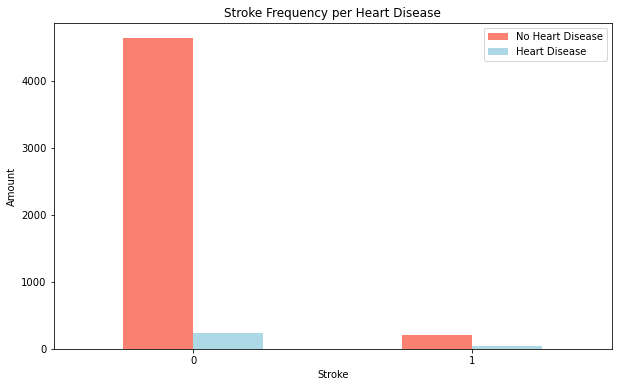

In [34]:

pd.crosstab(S.stroke,S.heart_disease).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.title("Stroke Frequency per Heart Disease")
plt.xlabel("Stroke")
plt.ylabel("Amount");
plt.legend(["No Heart Disease" , "Heart Disease "])
plt.xticks(rotation=0);

In [35]:
#converting categorical cols to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
S['gender_encoded'] = le.fit_transform(S.gender)
S.drop("gender",axis=1,inplace=True)
S

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1
1,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,0
5106,44873,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,0
5107,19723,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,0
5108,37544,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,1


In [36]:
S['work type'] = le.fit_transform(S.work_type)
S.drop("work_type",axis=1,inplace=True)

S['married'] = le.fit_transform(S.ever_married)
S.drop("ever_married",axis=1,inplace=True)

S['ResidenceType'] = le.fit_transform(S.Residence_type)
S.drop("Residence_type",axis=1,inplace=True)

S['smokingStatus'] = le.fit_transform(S.smoking_status)
S.drop("smoking_status",axis=1,inplace=True)

S


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_encoded,work type,married,ResidenceType,smokingStatus
0,9046,67.0,0,1,228.69,36.600000,1,1,2,1,1,1
1,51676,61.0,0,0,202.21,28.893237,1,0,3,1,0,2
2,31112,80.0,0,1,105.92,32.500000,1,1,2,1,0,2
3,60182,49.0,0,0,171.23,34.400000,1,0,2,1,1,3
4,1665,79.0,1,0,174.12,24.000000,1,0,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,0,2,1,1,2
5106,44873,81.0,0,0,125.20,40.000000,0,0,3,1,1,2
5107,19723,35.0,0,0,82.99,30.600000,0,0,3,1,0,2
5108,37544,51.0,0,0,166.29,25.600000,0,1,2,1,0,1


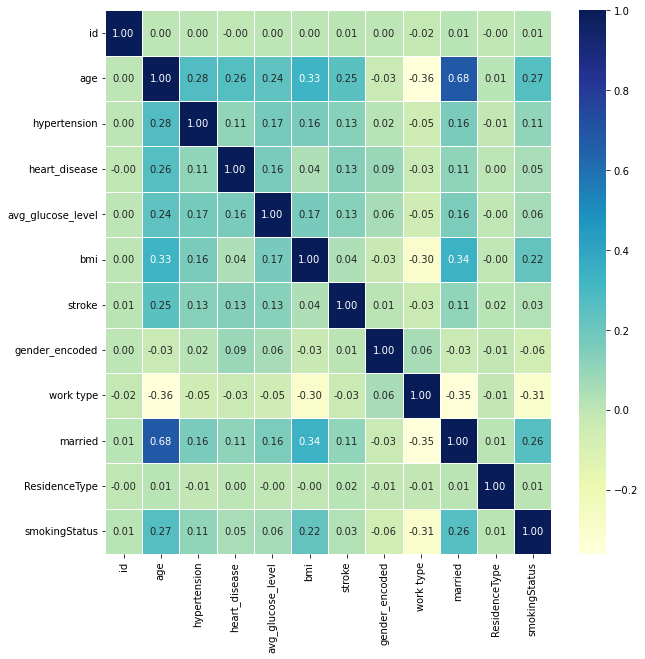

In [37]:
corr_matrix= S.corr()
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

In [38]:
X=S.drop('stroke' , axis=1)
y=S['stroke']

In [71]:
# oversampling to solve the class imbalance
from imblearn import under_sampling,over_sampling
from imblearn.over_sampling import RandomOverSampler
rus=RandomOverSampler(random_state=0)
Xresampled,yresampled=rus.fit_resample(X,y)
yresampled.value_counts()


1    4861
0    4861
Name: stroke, dtype: int64

In [75]:

models={"Logistic Regression" : LogisticRegression(),"KNN":KNeighborsClassifier(),"Random Forest":RandomForestClassifier()}
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores
            

In [107]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xresampled,yresampled,test_size=0.2)
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

{'Logistic Regression': 0.7141388174807198,
 'KNN': 0.9357326478149101,
 'Random Forest': 0.9938303341902314}

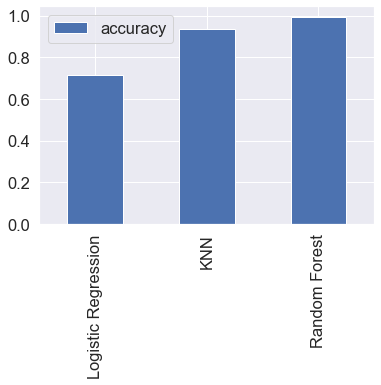

In [108]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

In [109]:
#tuning the KNN model
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [110]:
train_scores

[1.0,
 1.0,
 0.9738973897389739,
 0.9738973897389739,
 0.9535810723929535,
 0.9535810723929535,
 0.9353221036389353,
 0.9349363507779349,
 0.9168059663109168,
 0.9168059663109168,
 0.8959753118168959,
 0.8959753118168959,
 0.8793879387938794,
 0.8793879387938794,
 0.8611289700398611,
 0.8617718914748618,
 0.8427414169988428,
 0.8411984055548412,
 0.8224250996528224,
 0.8206249196348206]

In [111]:
test_scores

[0.9814910025706941,
 0.9814910025706941,
 0.9619537275064267,
 0.9619537275064267,
 0.9357326478149101,
 0.9357326478149101,
 0.9131105398457584,
 0.913624678663239,
 0.8951156812339331,
 0.8951156812339331,
 0.8730077120822622,
 0.8730077120822622,
 0.8570694087403599,
 0.8570694087403599,
 0.8416452442159383,
 0.842159383033419,
 0.8241645244215938,
 0.8179948586118252,
 0.7974293059125964,
 0.7948586118251928]

Maximum KNN score on the test data:98.15%


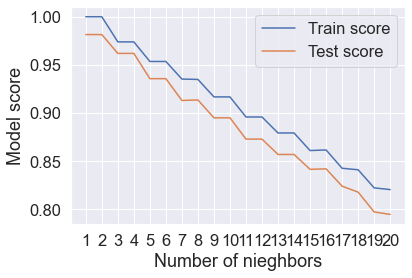

In [112]:
plt.plot(neighbors,train_scores,label="Train score");
plt.plot(neighbors,test_scores,label="Test score");
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of nieghbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores) * 100:.2f}%" )

In [80]:
log_reg_grid={"C":np.logspace(-4,4,20)
             ,"solver":["liblinear"]}

rf_grid={"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}


In [81]:
#tuning the logistic regression model
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [82]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [83]:
rs_log_reg.score(X_test,y_test) 

0.7763496143958869

In [84]:
#tuning the RF model
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [85]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [86]:
rs_rf.score(X_test,y_test)


0.9876606683804627

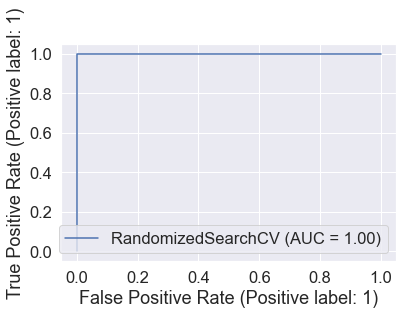

In [116]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rs_rf,X_test,y_test);

In [88]:
y_preds = rs_rf.predict(X_test)


In [90]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       989
           1       0.98      1.00      0.99       956

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



In [94]:
clf=RandomForestClassifier(n_estimators=510,
 min_samples_split= 14,
 min_samples_leaf= 1,
 max_depth= None)


In [99]:
cv_acc=cross_val_score(clf,Xresampled,yresampled,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.9911542733822083

In [96]:
cv_precision=cross_val_score(clf,Xresampled,yresampled,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.9828286978612223

In [97]:
cv_recall=cross_val_score(clf,Xresampled,yresampled,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9993833504624872

In [98]:
cv_f1=cross_val_score(clf,Xresampled,yresampled,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.9916354256802888

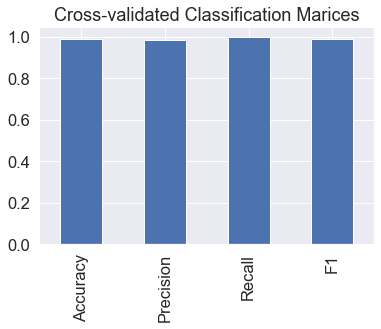

In [106]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_precision,"Recall":cv_recall,"F1":cv_f1},
index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Classification Marices",legend=False);